# Project 2: Multiclass and Linear Models

UIC CS 412, Fall 2018

_According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

There are two parts to this project. The first is on multiclass reductions. The second is on linear models and gradient descent. There is also a third part which gives you an opportunity for extra credit.

This project is adapted from the github materials for [A Course in Machine Learning](https://github.com/hal3/ciml).


### Files You'll Edit

``multiclass.py``: The multiclass classification implementation you need to complete.

``gd.py``: The gradient descent file you need to edit.

``quizbowl.py``: Multiclass evaluation of the quiz bowl dataset (optional).

``predictions.txt``: This file is automatically generated as part of Part 3 (optional).

### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: All of the datasets we'll use.



# Part 1: Multiclass Classification *[30% impl, 20% writeup]*

In this section, you will explore the differences between three
multiclass-to-binary reductions: one-versus-all (OVA), all-versus-all
(AVA), and a tree-based reduction (TREE).  The evaluation will be on different datasets from 
`datasets.py`.

The classification task we'll work with is wine classification. The dataset was downloaded from allwines.com. Your job is to predict the type of wine, given the description of the wine. There are two tasks: WineData has 20 different wines, WineDataSmall is just the first five of those (sorted roughly by frequency). You can find the names of the wines both in WineData.labels as well as the file wines.names.

To start out, let's import everything and train decision "stumps" (aka depth=1 decision trees) on the large data set:

In [1]:
from sklearn.tree import DecisionTreeClassifier
import multiclass
import util
from datasets import *
import importlib

h = multiclass.OVA(20, lambda: DecisionTreeClassifier(max_depth=1))
h.train(WineData.X, WineData.Y)
P = h.predictAll(WineData.Xte)
mean(P == WineData.Yte)
# 0.29499072356215211

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest


0.2949907235621521

That means 29% accuracy on this task. The most frequent class is:

In [2]:
print(mode(WineData.Y))
# 1
print(WineData.labels[1])
# Cabernet-Sauvignon

1
Cabernet-Sauvignon


And if you were to always predict label 1, you would get the following accuracy:

In [3]:
mean(WineData.Yte == 1)
# 0.17254174397031541

0.1725417439703154

So we're doing a bit (12%) better than that using decision stumps. 

The default implementation of OVA uses decision tree confidence (probability of prediction) to weigh the votes. You can switch to zero/one predictions to see the effect:

In [4]:
P = h.predictAll(WineData.Xte, useZeroOne=True)
mean(P == WineData.Yte)
# 0.19109461966604824

0.19109461966604824

As you can see, this is markedly worse.

Switching to the smaller data set for a minute, we can train, say, depth 3 decision trees:

In [5]:
h = multiclass.OVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print(mean(P == WineDataSmall.Yte))
# 0.590809628009
print(mean(WineDataSmall.Yte == 1))
# 0.407002188184

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
0.5886214442013129
0.40700218818380746


So using depth 3 trees we get an accuracy of about 60% (this number varies a bit), versus a baseline of 41%. That's not too terrible, but not great.

We can look at what this classifier is doing.

In [6]:
print(WineDataSmall.labels[0])
#'Sauvignon-Blanc'
util.showTree(h.f[0], WineDataSmall.words)
#citrus?
#-N-> lime?
#|    -N-> gooseberry?
#|    |    -N-> class 0	(356.0 for class 0, 10.0 for class 1)
#|    |    -Y-> class 1	(0.0 for class 0, 4.0 for class 1)
#|    -Y-> apple?
#|    |    -N-> class 1	(1.0 for class 0, 15.0 for class 1)
#|    |    -Y-> class 0	(2.0 for class 0, 0.0 for class 1)
#-Y-> grapefruit?
#|    -N-> flavors?
#|    |    -N-> class 1	(4.0 for class 0, 12.0 for class 1)
#|    |    -Y-> class 0	(11.0 for class 0, 5.0 for class 1)
#|    -Y-> opens?
#|    |    -N-> class 1	(0.0 for class 0, 14.0 for class 1)
#|    |    -Y-> class 0	(1.0 for class 0, 0.0 for class 1)

Sauvignon-Blanc
citrus?
-N-> lime?
|    -N-> gooseberry?
|    |    -N-> class 0	(356.0 for class 0, 10.0 for class 1)
|    |    -Y-> class 1	(0.0 for class 0, 4.0 for class 1)
|    -Y-> hint?
|    |    -N-> class 1	(1.0 for class 0, 15.0 for class 1)
|    |    -Y-> class 0	(2.0 for class 0, 0.0 for class 1)
-Y-> grapefruit?
|    -N-> flavors?
|    |    -N-> class 1	(4.0 for class 0, 12.0 for class 1)
|    |    -Y-> class 0	(11.0 for class 0, 5.0 for class 1)
|    -Y-> 2010?
|    |    -N-> class 1	(0.0 for class 0, 14.0 for class 1)
|    |    -Y-> class 0	(1.0 for class 0, 0.0 for class 1)


This should show the tree that's associated with predicting label 0 (which is stored in h.f[0]). The 1s mean "likely to be Sauvignon-Blanc" and the 0s mean "likely not to be".

Now, go in and complete the AVA implementation in `multiclass.py`. You should be able to train an AVA model on the small data set by:

In [7]:
import multiclass
import importlib
importlib.reload(multiclass)

h = multiclass.AVA(5, lambda: DecisionTreeClassifier(max_depth=5))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print(mean(P == WineDataSmall.Yte))
print(mean(WineDataSmall.Yte == 1))

training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier for 4 versus 0
training classifier for 4 versus 1
training classifier for 4 versus 2
training classifier for 4 versus 3
0.31291028446389496
0.40700218818380746


Next, you must implement a 
tree-based reduction MCTree in `multiclass.py`. Most of train is given to you, but predict you
must do all on your own. There is a `makeBalancedTree` function to help you:

In [8]:
t = multiclass.makeBalancedTree(range(5))
print(t)
# [[0 1]] [2 [3 4]]]
print(t.isLeaf)
# False
print(t.getRight())
# [2 [3 4]]
print(t.getRight().getLeft())
# 2
print(t.getRight().getLeft().isLeaf)
# True

[[0 1] [2 [3 4]]]
False
[2 [3 4]]
2
True


You should be able to train a MCTree model by:

In [9]:
import multiclass
import importlib
importlib.reload(multiclass)

h = multiclass.MCTree(t, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print(mean(P == WineDataSmall.Yte))
print(mean(WineDataSmall.Yte == 1))

training classifier for [0, 1] versus [2, 3, 4]
training classifier for [0] versus [1]
training classifier for [2] versus [3, 4]
training classifier for [3] versus [4]
0.562363238512035
0.40700218818380746


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU1 (10%):
Answer A, B, C for both OVA and AVA.

**(A) Using WineDataSmall, answer the following: What words are most indicative of being Sauvignon-Blanc? Which words are most indicative of not being Sauvignon-Blanc? What about Pinot-Noir (label==2)?**

In [10]:
# WU1(A) CODE HERE
print ('\033[1m' + 'OneVsAll starts here'+ '\033[0m')
h_ova = multiclass.OVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h_ova.train(WineDataSmall.X, WineDataSmall.Y)
P_ova = h_ova.predictAll(WineDataSmall.Xte)
print(mean(P_ova == WineDataSmall.Yte))
print(mean(WineDataSmall.Yte == 1))
print('\n'+ '\033[1m' + 'For ' + WineDataSmall.labels[0] + '\033[0m')
util.showTree(h_ova.f[0], WineDataSmall.words)
print('\n'+ '\033[1m' + 'For ' + WineDataSmall.labels[1] + '\033[0m')
util.showTree(h_ova.f[1], WineDataSmall.words)
print('\n'+ '\033[1m' + 'For ' + WineDataSmall.labels[2] + '\033[0m')
util.showTree(h_ova.f[2], WineDataSmall.words)
print('\n'+ '\033[1m' + 'For ' + WineDataSmall.labels[3] + '\033[0m')
util.showTree(h_ova.f[3], WineDataSmall.words)
print('\n'+ '\033[1m' + 'For ' + WineDataSmall.labels[4] + '\033[0m')
util.showTree(h_ova.f[4], WineDataSmall.words)

print ('\n' + '\033[1m' + 'AllVsAll starts here' + '\033[0m')
h_ava = multiclass.AVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h_ava.train(WineDataSmall.X, WineDataSmall.Y)
P_ava = h_ava.predictAll(WineDataSmall.Xte)
print(mean(P_ava == WineDataSmall.Yte))
print(mean(WineDataSmall.Yte == 1))
print('\n' + '\033[1m' + 'All vs Sauvignon-Blanc' + '\033[0m')
print(WineDataSmall.labels[0] + " vs " + WineDataSmall.labels[1])
util.showTree(h_ava.f[1][0], WineDataSmall.words)
print('\n' + WineDataSmall.labels[0] + " vs " + WineDataSmall.labels[2])
util.showTree(h_ava.f[2][0], WineDataSmall.words)
print('\n' + WineDataSmall.labels[0] + " vs " + WineDataSmall.labels[3])
util.showTree(h_ava.f[3][0], WineDataSmall.words)
print('\n' + WineDataSmall.labels[0] + " vs " + WineDataSmall.labels[4])
util.showTree(h_ava.f[4][0], WineDataSmall.words)
print('\n' + '\033[1m' + 'All vs Pinot-Noir' + '\033[0m')
print(WineDataSmall.labels[2] + " vs " + WineDataSmall.labels[0])
util.showTree(h_ava.f[2][0], WineDataSmall.words)
print('\n' + WineDataSmall.labels[2] + " vs " + WineDataSmall.labels[1])
util.showTree(h_ava.f[2][1], WineDataSmall.words)
print('\n' + WineDataSmall.labels[2] + " vs " + WineDataSmall.labels[3])
util.showTree(h_ava.f[3][2], WineDataSmall.words)
print('\n' + WineDataSmall.labels[2] + " vs " + WineDataSmall.labels[4])
util.showTree(h_ava.f[4][2], WineDataSmall.words)

OneVsAll starts here
training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
0.6061269146608315
0.40700218818380746

For Sauvignon-Blanc
citrus?
-N-> lime?
|    -N-> gooseberry?
|    |    -N-> class 0	(356.0 for class 0, 10.0 for class 1)
|    |    -Y-> class 1	(0.0 for class 0, 4.0 for class 1)
|    -Y-> apple?
|    |    -N-> class 1	(1.0 for class 0, 15.0 for class 1)
|    |    -Y-> class 0	(2.0 for class 0, 0.0 for class 1)
-Y-> grapefruit?
|    -N-> flavors?
|    |    -N-> class 1	(4.0 for class 0, 12.0 for class 1)
|    |    -Y-> class 0	(11.0 for class 0, 5.0 for class 1)
|    -Y-> extremely?
|    |    -N-> class 1	(0.0 for class 0, 14.0 for class 1)
|    |    -Y-> class 0	(1.0 for class 0, 0.0 for class 1)

For Cabernet-Sauvignon
tannins?
-N-> blackberry?
|    -N-> black?
|    |    -N-> class 0	(173.0 for class 0, 30.0 for class 1)
|    |    -Y-> 

**WU1(A) ANS:**<br>For OVA,
<br>Words most indicative of being Sauvignon-Blanc: 'citrus', 'lime' and 'grapefruit'</br>
<br>Words most indicative of not being Sauvignon-Blanc: 'apple', 'flavors' and 'lingering'</br>
<br>Words most indicative of being Pinot-Noir: 'cherry', 'raspberries' and 'strawberry'</br>
<br>Words most indicative of not being Pinot-Noir: 'cassis', 'petit' and 'round'
<br></br>
<br>For AVA,
<br>Words most indicative of being Sauvignon-Blanc: 'citrus', 'lime', & 'crisp'</br>
<br>Words most indicative of not being Sauvignon-Blanc: 'harmonious', 'red' and 'ripe'</br>
<br>Words most indicative of being Pinot-Noir: 'red & 'harmonious'</br>
<br>Words most indicative of not being Pinot-Noir: 'lemon', 'cassis'& 'peach'</br>

**(B) Train depth 3 decision trees on the full WineData task (with 20 labels). What accuracy do you get? How long does this take (in seconds)? One of my least favorite wines is Viognier -- what words are indicative of this?**

In [11]:
# WU1(B) CODE HERE
import time
s1 = time.time()
print ('\033[1m' + 'OneVsAll training starts here'+ '\033[0m')
h_ova = multiclass.OVA(20, lambda: DecisionTreeClassifier(max_depth=3))
h_ova.train(WineData.X, WineData.Y)
p1 = h_ova.predictAll(WineData.Xte)
e1 = time.time()
print(mean(p1 == WineData.Yte))
print(mean(WineData.Yte == 1))
print("Time Taken in seconds for OVA:", e1-s1)

print('\n'+ '\033[1m' + WineData.labels[17] +' vs All'+ '\033[0m')
util.showTree(h_ova.f[17], WineData.words)

print ('\n' + '\033[1m' + 'AllVsAll training starts here'+ '\033[0m')
s2 = time.time()
h_ava = multiclass.AVA(20, lambda: DecisionTreeClassifier(max_depth=3))
h_ava.train(WineData.X, WineData.Y)
p2 = h_ava.predictAll(WineData.Xte)
e2 = time.time()
print(mean(p2 == WineData.Yte))
print(mean(WineData.Yte == 1))
print("Time Taken in seconds for AVA:", e2-s2)

for i in range (0,17):
    print('\n' + '\033[1m' + WineData.labels[17] + " vs " + WineData.labels[i] + '\033[0m')
    util.showTree(h_ava.f[17][i], WineData.words)
for i in range (18,20):
    print('\n' + '\033[1m' + WineData.labels[17] + " vs " + WineData.labels[i] + '\033[0m')
    util.showTree(h_ava.f[i][17], WineData.words)


OneVsAll training starts here
training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest
0.362708719851577
0.1725417439703154
Time Taken in seconds for OVA: 2.3826615810394287

Viognier vs All
peaches?
-N-> nectarine?
|    -N-> chilled?
|    |    -N-> class 0	(1036.0 for class 0, 1.0 for 

0.06307977736549165
0.1725417439703154
Time Taken in seconds for AVA: 15.78059196472168

Viognier vs Sauvignon-Blanc
floral?
-N-> harmonious?
|    -N-> grenache?
|    |    -N-> class 0	(59.0 for class 0, 2.0 for class 1)
|    |    -Y-> class 1	(0.0 for class 0, 1.0 for class 1)
|    -Y-> class 1	(0.0 for class 0, 1.0 for class 1)
-Y-> richness?
|    -N-> class 1	(0.0 for class 0, 4.0 for class 1)
|    -Y-> class 0	(1.0 for class 0, 0.0 for class 1)

Viognier vs Cabernet-Sauvignon
peaches?
-N-> peach?
|    -N-> pear?
|    |    -N-> class 0	(187.0 for class 0, 0.0 for class 1)
|    |    -Y-> class 1	(0.0 for class 0, 1.0 for class 1)
|    -Y-> class 1	(0.0 for class 0, 3.0 for class 1)
-Y-> class 1	(0.0 for class 0, 4.0 for class 1)

Viognier vs Pinot-Noir
peaches?
-N-> peach?
|    -N-> apple?
|    |    -N-> class 0	(144.0 for class 0, 0.0 for class 1)
|    |    -Y-> class 1	(0.0 for class 0, 1.0 for class 1)
|    -Y-> class 1	(0.0 for class 0, 3.0 for class 1)
-Y-> class 1	(0.0 for clas

**WU1(B) ANS:**<br>For OVA,
<br>Accuracy obtained is 0.362708719851577 and it took approximately 2.4 seconds</br>
<br>Words most indicative of Viognier are: 'peaches' and 'milk'</br>
<br></br>
<br>For AVA,
<br>Accuracy obtained is 0.06307977736549165 and it took approximately 15.8 seconds</br>
<br>Words most indicative of Viognier are: 'floral', 'peaches' and 'nectarine'</br>

**(C) Compare the accuracy using zero-one predictions versus using confidence on the full WineData. How much difference does it make?**

In [13]:
# WU1(C) CODE HERE

importlib.reload(multiclass)

print('\033[1m' + 'For OVA,' + '\033[0m')
p1 = h_ova.predictAll(WineData.Xte)
a1 = mean(p1 == WineData.Yte)
print("Accuracy using confidence =", a1)
p2 = h_ova.predictAll(WineData.Xte, useZeroOne=True)
a2 = mean(p2 == WineData.Yte)
print("Accuracy using zero-one predictions =", a2)
print("Difference in Accuracies", a1-a2)
print('\n' + '\033[1m' + 'For AVA,' + '\033[0m')
p1 = h_ava.predictAll(WineData.Xte)
a1 = mean(p1 == WineData.Yte)
print("Accuracy using confidence =", a1)
p2 = h_ava.predictAll(WineData.Xte, useZeroOne = True)
a2 = mean(p2 == WineData.Yte)
print("Accuracy using zero-one predictions =", a2)
print("Difference in Accuracies", a1-a2)

For OVA,
Accuracy using confidence = 0.362708719851577
Accuracy using zero-one predictions = 0.24118738404452691
Difference in Accuracies 0.12152133580705007

For AVA,
Accuracy using confidence = 0.06307977736549165
Accuracy using zero-one predictions = 0.07977736549165121
Difference in Accuracies -0.016697588126159554


**WU1(C) ANS:**<br>For OVA, the accuracy decreased by approximately 0.1215 on using zero-one predications compared with while using confidence. While for AVA, the accuracy increased by approximately 0.0167 on using zero-one predications compared with while using confidence.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU2 (10%):
Using decision trees of constant depth for each
classifier (but you choose it as well as you can!), train AVA, OVA and
MCTree (using balanced trees) for the WineData. Which does best and why?

In [14]:
# WU2 CODE HERE
ova,ava,mct=[],[],[]
for depth in range (1,11):
    h_ova = multiclass.OVA(20, lambda: DecisionTreeClassifier(max_depth=depth))
    h_ova.train(WineData.X, WineData.Y)
    P_ova = h_ova.predictAll(WineData.Xte)
    ova.append(mean(P_ova == WineData.Yte))
    h_ava = multiclass.AVA(20, lambda: DecisionTreeClassifier(max_depth=depth))
    h_ava.train(WineData.X, WineData.Y)
    P_ava = h_ava.predictAll(WineData.Xte)
    ava.append(mean(P_ava == WineData.Yte))
    t = multiclass.makeBalancedTree(range(20))
    h_t = multiclass.MCTree(t, lambda: DecisionTreeClassifier(max_depth=depth))
    h_t.train(WineData.X, WineData.Y)
    P_t = h_t.predictAll(WineData.Xte)
    mct.append(mean(P_t == WineData.Yte))

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest
training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier 

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest
training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier 

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest
training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier 

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest
training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier 

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest
training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier 

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest
training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier 

training classifier for [10] versus [11]
training classifier for [12] versus [13, 14]
training classifier for [13] versus [14]
training classifier for [15, 16] versus [17, 18, 19]
training classifier for [15] versus [16]
training classifier for [17] versus [18, 19]
training classifier for [18] versus [19]
training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
t

training classifier for [10, 11] versus [12, 13, 14]
training classifier for [10] versus [11]
training classifier for [12] versus [13, 14]
training classifier for [13] versus [14]
training classifier for [15, 16] versus [17, 18, 19]
training classifier for [15] versus [16]
training classifier for [17] versus [18, 19]
training classifier for [18] versus [19]
training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16

training classifier for [5, 6] versus [7, 8, 9]
training classifier for [5] versus [6]
training classifier for [7] versus [8, 9]
training classifier for [8] versus [9]
training classifier for [10, 11, 12, 13, 14] versus [15, 16, 17, 18, 19]
training classifier for [10, 11] versus [12, 13, 14]
training classifier for [10] versus [11]
training classifier for [12] versus [13, 14]
training classifier for [13] versus [14]
training classifier for [15, 16] versus [17, 18, 19]
training classifier for [15] versus [16]
training classifier for [17] versus [18, 19]
training classifier for [18] versus [19]
training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier

training classifier for [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] versus [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
training classifier for [0, 1, 2, 3, 4] versus [5, 6, 7, 8, 9]
training classifier for [0, 1] versus [2, 3, 4]
training classifier for [0] versus [1]
training classifier for [2] versus [3, 4]
training classifier for [3] versus [4]
training classifier for [5, 6] versus [7, 8, 9]
training classifier for [5] versus [6]
training classifier for [7] versus [8, 9]
training classifier for [8] versus [9]
training classifier for [10, 11, 12, 13, 14] versus [15, 16, 17, 18, 19]
training classifier for [10, 11] versus [12, 13, 14]
training classifier for [10] versus [11]
training classifier for [12] versus [13, 14]
training classifier for [13] versus [14]
training classifier for [15, 16] versus [17, 18, 19]
training classifier for [15] versus [16]
training classifier for [17] versus [18, 19]
training classifier for [18] versus [19]
training classifier for 0 versus rest
training classifier for 1 v

training classifier for [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] versus [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
training classifier for [0, 1, 2, 3, 4] versus [5, 6, 7, 8, 9]
training classifier for [0, 1] versus [2, 3, 4]
training classifier for [0] versus [1]
training classifier for [2] versus [3, 4]
training classifier for [3] versus [4]
training classifier for [5, 6] versus [7, 8, 9]
training classifier for [5] versus [6]
training classifier for [7] versus [8, 9]
training classifier for [8] versus [9]
training classifier for [10, 11, 12, 13, 14] versus [15, 16, 17, 18, 19]
training classifier for [10, 11] versus [12, 13, 14]
training classifier for [10] versus [11]
training classifier for [12] versus [13, 14]
training classifier for [13] versus [14]
training classifier for [15, 16] versus [17, 18, 19]
training classifier for [15] versus [16]
training classifier for [17] versus [18, 19]
training classifier for [18] versus [19]


In [15]:
print ("OVA Training Accuracies for Depth 1 to 10 are:", ova)
print ("\nAVA Training Accuracies for Depth 1 to 10 are:", ava)
print ("\nMCTree, using balanced trees, Training Accuracies for Depth 1 to 10 are:", mct)

OVA Training Accuracies for Depth 1 to 10 are: [0.2949907235621521, 0.35992578849721707, 0.3654916512059369, 0.35435992578849723, 0.3608534322820037, 0.36178107606679033, 0.3562152133580705, 0.32560296846011133, 0.32189239332096475, 0.3070500927643785]

AVA Training Accuracies for Depth 1 to 10 are: [0.05844155844155844, 0.0575139146567718, 0.059369202226345084, 0.06307977736549165, 0.06586270871985157, 0.06215213358070501, 0.06493506493506493, 0.07142857142857142, 0.06493506493506493, 0.06307977736549165]

MCTree, using balanced trees, Training Accuracies for Depth 1 to 10 are: [0.2597402597402597, 0.2847866419294991, 0.3098330241187384, 0.3042671614100185, 0.310760667903525, 0.3051948051948052, 0.3116883116883117, 0.3033395176252319, 0.3181818181818182, 0.3144712430426716]


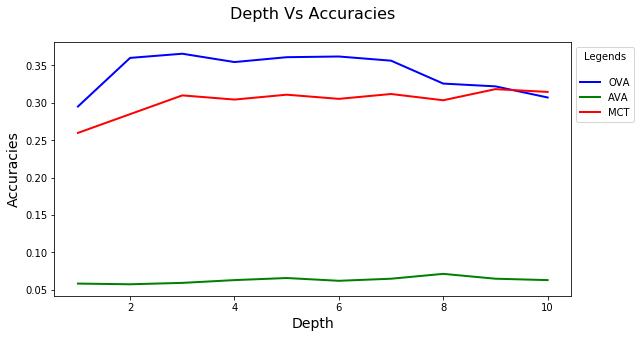

In [16]:
# Plotting above values for analysis
import matplotlib.pyplot as plt
plt.title("Depth Vs Accuracies\n",fontsize=16)
plt.xlabel('Depth',fontsize=14)
plt.ylabel('Accuracies',fontsize=14)
plt.plot(range(1,11), ova, linewidth=2, color='blue', label='OVA')
plt.plot(range(1,11), ava, linewidth=2, color='green', label='AVA')
plt.plot(range(1,11), mct, linewidth=2, color='red', label='MCT')
plt.legend(bbox_to_anchor=(1,1), loc='best', title="Legends\n")
plt.tight_layout(rect=[0, 0, 1.5, 1.2])
plt.show()

**WU2 ANSWER**

Using Decision Tree of constant depths from 1 to 10 for each of the three OVA, AVA and MCTree (using balanced trees) the above accuracy values were obtained. From the graph it can be noticed that OVA outperforms AVA and MCTree on WineData for most of the depth values. This happens because of the availability of more number of training samples for each of the k-classifiers when compared with the training samples available during training of those classifiers in AVA and MCTree.


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU-EC1 ExtraCredit (10%):
Build a better tree (any way you want) other
than the balanced binary tree. Fill in your code for this in
`getMyTreeForWine`, which defaults to a balanced tree. It should get
at least 5% lower absolute error to get the extra credit. Describe what you
did.

In [17]:
from imports import *
import multiclass
import importlib
importlib.reload(multiclass)

print ('\033[1m' + 'MCTree, using balanced tree and depth = 4' + '\033[0m')
t1 = multiclass.makeBalancedTree(range(20))
h1 = multiclass.MCTree(t1, lambda: DecisionTreeClassifier(max_depth=4))
h1.train(WineData.X, WineData.Y)
P1 = h1.predictAll(WineData.Xte)
print(mean(P1 == WineData.Yte))
print(mean(WineData.Yte == 1))

print ('\n'+ '\033[1m' + 'MCTree, using my tree and depth = 4' + '\033[0m')
t2 = multiclass.getMyTreeForWine(range(20))
h2 = multiclass.MCTree(t2, lambda: DecisionTreeClassifier(max_depth=4))
h2.train(WineData.X, WineData.Y)
P2 = h2.predictAll(WineData.Xte)
print(mean(P2 == WineData.Yte))
print(mean(WineData.Yte == 1))

MCTree, using balanced tree and depth = 4
training classifier for [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] versus [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
training classifier for [0, 1, 2, 3, 4] versus [5, 6, 7, 8, 9]
training classifier for [0, 1] versus [2, 3, 4]
training classifier for [0] versus [1]
training classifier for [2] versus [3, 4]
training classifier for [3] versus [4]
training classifier for [5, 6] versus [7, 8, 9]
training classifier for [5] versus [6]
training classifier for [7] versus [8, 9]
training classifier for [8] versus [9]
training classifier for [10, 11, 12, 13, 14] versus [15, 16, 17, 18, 19]
training classifier for [10, 11] versus [12, 13, 14]
training classifier for [10] versus [11]
training classifier for [12] versus [13, 14]
training classifier for [13] versus [14]
training classifier for [15, 16] versus [17, 18, 19]
training classifier for [15] versus [16]
training classifier for [17] versus [18, 19]
training classifier for [18] versus [19]
0.3051948051948052
0.17

**WU-EC1 ANSWER**
<br>In Balanced tree, tree is splitted in two equal halves such as floor("total_nodes/2") nodes is on the left subtree and the remaining on the right subtree. The accuracy obtained is approximately 0.305</br>
<br>In order to increase the accuracy, I changed the splitting from floor("total_nodes/2") to "total_nodes - 1" in getMyTreeForWine(). Using this modificiation it can be observed that the accuracy has increased to approximately 0.373</br>
<br>The depth of the tree is same in both scenarios.</br>

# Part 2: Gradient Descent and Linear Classification *[30% impl, 20% writeup]*

To get started with linear models, we will implement a generic
gradient descent method.  This should go in `gd.py`, which
contains a single (short) function: `gd`. This takes five
parameters: the function we're optimizing, it's gradient, an initial
position, a number of iterations to run, and an initial step size.

In each iteration of gradient descent, we will compute the gradient
and take a step in that direction, with step size `eta`.  We
will have an *adaptive* step size, where `eta` is computed
as `stepSize` divided by the square root of the iteration
number (counting from one).

Once you have an implementation running, we can check it on a simple
example of minimizing the function `x^2`:

In [118]:
import gd
importlib.reload(gd)
gd.gd(lambda x: x**2, lambda x: 2*x, 10, 10, 0.2)
#(1.0034641051795872, array([ 100.        ,   36.        ,   18.5153247 ,   10.95094653,
#          7.00860578,    4.72540613,    3.30810578,    2.38344246,
#          1.75697198,    1.31968118,    1.00694021]))

(1.0034641051795872,
 array([100.        ,  36.        ,  18.5153247 ,  10.95094653,
          7.00860578,   4.72540613,   3.30810578,   2.38344246,
          1.75697198,   1.31968118,   1.00694021]))

You can see that the "solution" found is about 1, which is not great
(it should be zero!), but it's better than the initial value of ten!
If yours is going up rather than going down, you probably have a sign
error somewhere!

We can let it run longer and plot the trajectory:

0.003645900464603937


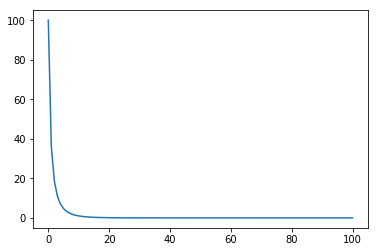

In [120]:
importlib.reload(gd)
from imports import *
x, trajectory = gd.gd(lambda x: x**2, lambda x: 2*x, 10, 100, 0.2)
print(x)
# 0.003645900464603937
plot(trajectory)
show()

It's now found a value close to zero and you can see that the
objective is decreasing by looking at the plot.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU3 (5%):
Find a few values of step size where it converges and a few values where it diverges.  Where does the threshold seem to
be?

**WU3 Answer**
<br>Following are the values of x obtained for the adjacent step sizes considered:<br>

|step size|x
|:---:|:---:
|-0.1|373.3
|0|10
|0.1|0.21734
|0.5|0
|5|0
|6|9.1e-11
|6.5|0.073
|7|1192445.5

For negative values of step sizes the algorithm diverges as can be seen for step size = -0.1 while for positive values of step sizes the algorithm converges which can be seen for step size = 0.1, 0.5 etc. For step size = 0, it neither converges nor diverges rather remains constant. Also, for step sizes 5, 6, 6.5 and 7, x values goes up from 0 to small positive to large  positive. Optimum value of x (i.e x=0) is obtained for step size = 5.

step size = -0.1
x = 373.3862480229385


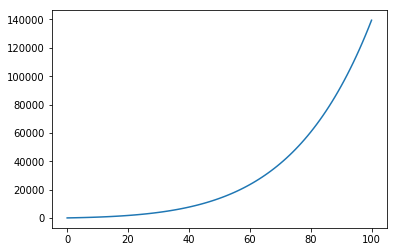

step size = 0
x = 10.0


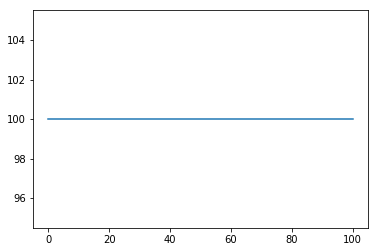

step size = 0.1
x = 0.21734427526984595


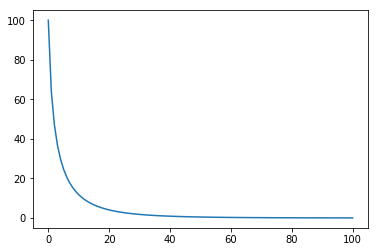

step size = 0.5
x = 0.0


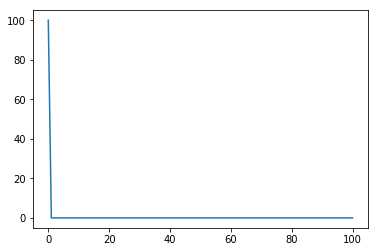

step size = 5
x = 0.0


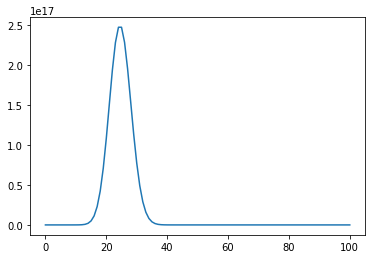

step size = 6
x = 9.107243088758273e-11


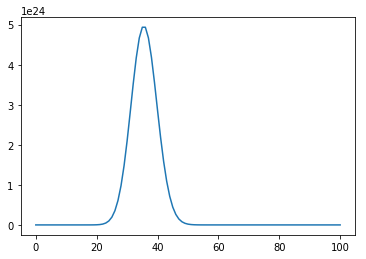

step size = 6.5
x = 0.07329778064924164


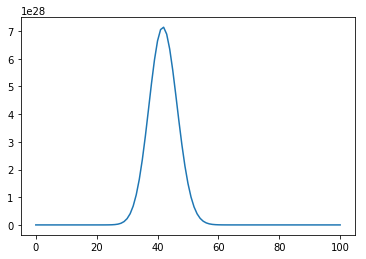

step size = 7
x = 1192445.5000873771


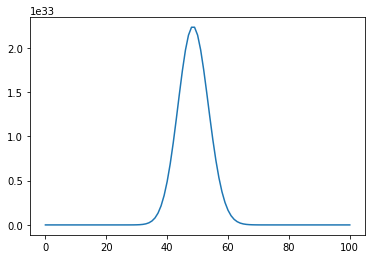

In [133]:
importlib.reload(gd)
from imports import *
step_size=[-0.1, 0, 0.1, 0.5, 5, 6, 6.5, 7]
for s in step_size:
    x, trajectory = gd.gd(lambda x: x**2, lambda x: 2*x, 10, 100, s)
    print("step size =",s)
    print("x =",x)
    plot(trajectory)
    show(True)

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU4 (10%):
Come up with a *non-convex* univariate
optimization problem.  Plot the function you're trying to minimize and
show two runs of `gd`, one where it gets caught in a local
minimum and one where it manages to make it to a global minimum.  (Use
different starting points to accomplish this.)

If you implemented it well, this should work in multiple dimensions,
too:

[0.0036459  0.00182295]


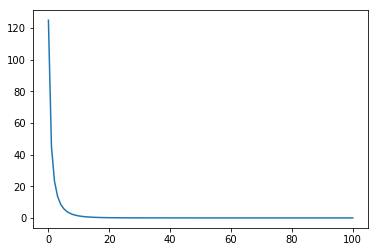

In [136]:
x, trajectory = gd.gd(lambda x: linalg.norm(x)**2, lambda x: 2*x, array([10,5]), 100, 0.2)
print(x)
# array([ 0.0036459 ,  0.00182295])
plot(trajectory)
show(True)


Function considered



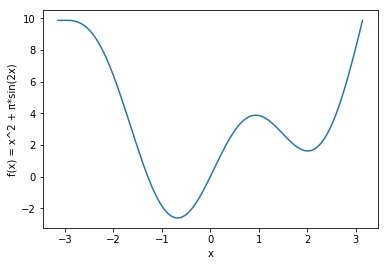


Global minima is found at x = -0.6768266541630303 
The starting point taken is 0.5 and step size is 0.2



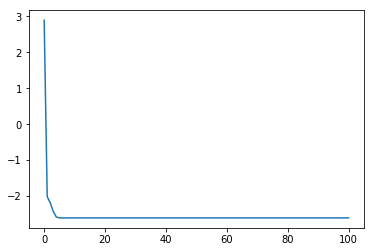


Local minima is found at x = 2.00923253218308 
The starting point taken is 1 and step size is 0.2



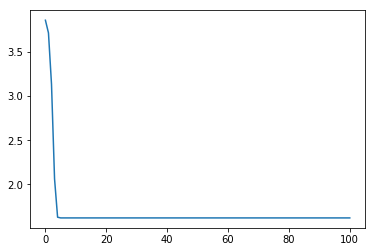

In [181]:
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 256)
plt.plot(x, x**2+math.pi*np.sin(2*x))
plt.xlabel('x')
plt.ylabel('f(x) = x^2 + π*sin(2x)')
print ("\nFunction considered\n")
plt.show()

x, trajectory = gd.gd(lambda x: x**2+math.pi*np.sin(2*x), lambda x: 2*x + 2*(math.pi)*cos(2*x), 0.5, 100, 0.2)
print ("\nGlobal minima is found at x =",x,"\nThe starting point taken is 0.5 and step size is 0.2\n")
plot(trajectory)
show(True)

x, trajectory = gd.gd(lambda x: x**2+math.pi*np.sin(2*x), lambda x: 2*x + 2*(math.pi)*cos(2*x), 1, 100, 0.2)
print ("\nLocal minima is found at x =",x,"\nThe starting point taken is 1 and step size is 0.2\n")
plot(trajectory)
show(True)

Our generic linear classifier implementation is
in `linear.py`.  The way this works is as follows.  We have an
interface `LossFunction` that we want to minimize.  This must
be able to compute the loss for a pair `Y` and `Yhat`
where, the former is the truth and the latter are the predictions.  It
must also be able to compute a gradient when additionally given the
data `X`.  This should be all you need for these.

There are three loss function stubs: `SquaredLoss` (which is
implemented for you!), `LogisticLoss` and `HingeLoss`
(both of which you'll have to implement.  My suggestion is to hold off
implementing the other two until you have the linear classifier
working.

The `LinearClassifier` class is a stub implemention of a
generic linear classifier with an l2 regularizer.  It
is *unbiased* so all you have to take care of are the weights.
Your implementation should go in `train`, which has a handful
of stubs.  The idea is to just pass appropriate functions
to `gd` and have it do all the work.  See the comments inline
in the code for more information.
 
Once you've implemented the function evaluation and gradient, we can
test this.  We'll begin with a very simple 2D example data set so that
we can plot the solutions.  We'll also start with *no
regularizer* to help you figure out where errors might be if you
have them.  (You'll have to import `mlGraphics` to make this
work.)

Training accuracy 0.91, test accuracy 0.86
w=array([ 2.73466371, -0.29563932])


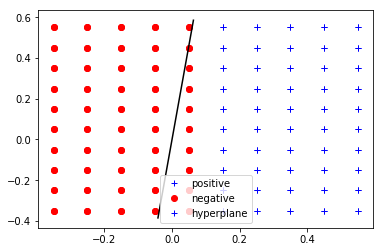

In [187]:
from imports import *
import linear
import importlib
import mlGraphics
importlib.reload(linear)

f = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 'lambda': 0, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.TwoDAxisAligned)
# Training accuracy 0.91, test accuracy 0.86
print(f)
# w=array([ 2.73466371, -0.29563932])
mlGraphics.plotLinearClassifier(f, datasets.TwoDAxisAligned.X, datasets.TwoDAxisAligned.Y)
show()

Note that even though this data is clearly linearly separable,
the *unbiased* classifier is unable to perfectly separate it.

If we change the regularizer, we'll get a slightly different
solution:

In [188]:
f = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 'lambda': 10, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.TwoDAxisAligned)
# Training accuracy 0.9, test accuracy 0.86
print(f)
# w=array([ 1.30221546, -0.06764756])

Training accuracy 0.9, test accuracy 0.86
w=array([ 1.30221546, -0.06764756])


As expected, the weights are *smaller*.

Now, we can try different loss functions.  Implement logistic loss and
hinge loss.  Here are some simple test cases:

In [196]:
from imports import *
import linear
import importlib
import mlGraphics
importlib.reload(linear)
f = linear.LinearClassifier({'lossFunction': linear.LogisticLoss(), 'lambda': 10, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.TwoDDiagonal)
# Training accuracy 0.99, test accuracy 0.86
print(f)
# w=array([ 0.29809083,  1.01287561])

f = linear.LinearClassifier({'lossFunction': linear.HingeLoss(), 'lambda': 1, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.TwoDDiagonal)
# Training accuracy 0.98, test accuracy 0.86
print(f)
# w=array([ 1.17110065,  4.67288657])

Training accuracy 0.99, test accuracy 0.86
w=array([0.29809083, 1.01287561])
Training accuracy 0.98, test accuracy 0.86
w=array([1.17110065, 4.67288657])


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU5 (5%):
For each of the loss functions, train a model on the
binary version of the wine data (called WineDataBinary) and evaluate
it on the test data. You should use lambda=1 in all cases. Which works
best? For that best model, look at the learned weights. Find
the *words* corresponding to the weights with the greatest
positive value and those with the greatest negative value (this is
like LAB3). Hint: look at WineDataBinary.words to get the id-to-word
mapping. List the top 5 positive and top 5 negative and explain.


For Squared Loss Function:
Training accuracy 0.242914979757085, test accuracy 0.31365313653136534


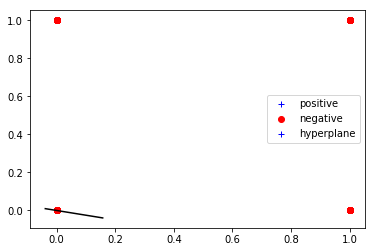


For Logistic Loss Function:
Training accuracy 0.9959514170040485, test accuracy 0.974169741697417


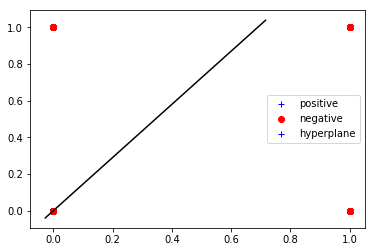


For Hinge Loss Function:
Training accuracy 0.7530364372469636, test accuracy 0.6863468634686347


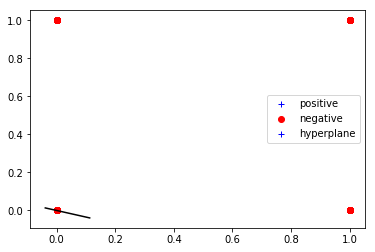


Top 5 positive weights and words corresponding to these weights:
[0.6064232619016882, 0.6891990079029969, 0.7108905521536929, 0.7701247691557765, 0.8832897531176559]
['tropical', 'acidity', 'lime', 'crisp', 'citrus']

Top 5 negative weights and words corresponding to these weights:
[-1.1695212164040418, -0.7653093906427056, -0.6835931677893774, -0.6295907281434329, -0.5321916724675303]
['tannins', 'black', 'dark', 'cherry', 'blackberry']


In [212]:
from imports import *
import linear
import importlib
import mlGraphics,runClassifier
importlib.reload(linear)
print ("\nFor Squared Loss Function:")
f1 = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 'lambda': 1, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f1, datasets.WineDataBinary)
mlGraphics.plotLinearClassifier(f1, datasets.WineDataBinary.Xte, datasets.WineDataBinary.Yte)
show(True)
print ("\nFor Logistic Loss Function:")
f2 = linear.LinearClassifier({'lossFunction': linear.LogisticLoss(), 'lambda': 1, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f2, datasets.WineDataBinary)
mlGraphics.plotLinearClassifier(f2, datasets.WineDataBinary.Xte, datasets.WineDataBinary.Yte)
show(True)
print ("\nFor Hinge Loss Function:")
f3 = linear.LinearClassifier({'lossFunction': linear.HingeLoss(), 'lambda': 1, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f3, datasets.WineDataBinary)
mlGraphics.plotLinearClassifier(f3, datasets.WineDataBinary.Xte, datasets.WineDataBinary.Yte)
show(True)

words = datasets.WineDataBinary().words
weight, word = (list(x) for x in zip(*sorted(zip(f2.getRepresentation(), words))))
print ("\nTop 5 positive weights and words corresponding to these weights:")
print (weight[-5:])
print (word[-5:])
print ("\nTop 5 negative weights and words corresponding to these weights:")
print (weight[:5])
print (word[:5])

**WU5 Answer**
<br>The logistic loss function works the best as the highest training and testing accuracy is achieved using this function among all the three functions while squared loss function gives the lowest training and testing accuracy. Reasoning: Squared loss function goes up to infinity on either sides and increases the loss value. It penalizes heavily for incorrect prediction because the penalty is square of the predicted value. Hinge loss function linearly penalizes for incorrect prediction and assigns zero loss for correct prediction. So, it performs better than Squared Loss function. However, the logistic loss function is quite similar to the zero-one loss function and so it gives the best accuracy.</br>

<br>_Top 5 positive weights and words corresponding to these weights:_
<br>[0.6064232619016882, 0.6891990079029969, 0.7108905521536929, 0.7701247691557765, 0.8832897531176559]
<br>['tropical', 'acidity', 'lime', 'crisp', 'citrus']

<br>_Top 5 negative weights and words corresponding to these weights:_
<br>[-1.1695212164040418, -0.7653093906427056, -0.6835931677893774, -0.6295907281434329, -0.5321916724675303]
<br>['tannins', 'black', 'dark', 'cherry', 'blackberry']

# Part 3: Classification with Many Classes *[0% -- up to 15% extra credit]*

Finally, we'll do multiclass classification **using Scikit-learn** functionality. You can find the documentation here: http://scikit-learn.org/stable/modules/multiclass.html.

Quiz bowl is a game in which two teams compete head-to-head to answer questions from different areas of knowledge. It lets players interrupt the reading of a question when they know the answer. The goal here is to see how well a classifier performs in predicting the `Answer` of a question when a different portion of the question is revealed.

Here's an example question from the development data:

    206824,dev,History,Alan Turing,"This man and Donald Bayley created a secure voice communications machine called ""Delilah"". ||| The Chinese Room Experiment was developed by John Searle in response to one of this man's namesake tests. ||| He showed that the halting problem was undecidable. ||| He devised a bombe with Gordon Welchman that found the settings of an Enigma machine. ||| One of this man's eponymous machines which can perform any computing task is his namesake ""complete."" Name this man, whose eponymous test is used to determine if a machine can exhibit behavior indistinguishable from that of a human." 

The more of the question you get, the easier the problem becomes.

The default code below just runs OVA and AVA on top of a linear SVM (it might take a few seconds):

In [213]:
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from numpy import *
import datasets
import importlib

importlib.reload(datasets)

if not datasets.Quizbowl.loaded:
    datasets.loadQuizbowl()

print('\n\nRUNNING ON EASY DATA\n')
    
print('training ova')
X = datasets.QuizbowlSmall.X
Y = datasets.QuizbowlSmall.Y
ova = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ova')
ovaDevPred = ova.predict(datasets.QuizbowlSmall.Xde)
print('error = {0}'.format(mean(ovaDevPred != datasets.QuizbowlSmall.Yde)))

print('training ava')
ava = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ava')
avaDevPred = ava.predict(datasets.QuizbowlSmall.Xde)
print('error = {0}'.format(mean(avaDevPred != datasets.QuizbowlSmall.Yde)))

print('\n\nRUNNING ON HARD DATA\n')
    
print('training ova')
X = datasets.QuizbowlHardSmall.X
Y = datasets.QuizbowlHardSmall.Y
ova = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ova')
ovaDevPred = ova.predict(datasets.QuizbowlHardSmall.Xde)
print('error = {0}'.format(mean(ovaDevPred != datasets.QuizbowlHardSmall.Yde)))

print('training ava')
ava = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ava')
avaDevPred = ava.predict(datasets.QuizbowlHardSmall.Xde)
print('error = {0}'.format(mean(avaDevPred != datasets.QuizbowlHardSmall.Yde)))

savetxt('predictions.txt', avaDevPred)

Loading Quizbowl dataset...

total labels: 2370
unique features: 8416
total training examples: 8845


Loading QuizbowlSmall dataset...

total labels: 31
unique features: 8416
total training examples: 361


Loading QuizbowlHard dataset...

total labels: 2370
unique features: 4132
total training examples: 8845


Loading QuizbowlHardSmall dataset...

total labels: 31
unique features: 4132
total training examples: 361


RUNNING ON EASY DATA

training ova
predicting ova
error = 0.2934131736526946
training ava
predicting ava
error = 0.218562874251497


RUNNING ON HARD DATA

training ova
predicting ova
error = 0.5958083832335329
training ava
predicting ava
error = 0.5538922155688623


When you run the code above, you should see some statistics of the loaded datasets and the following error rates on two of the datasets `QuizbowlSmall` and `QuizbowlHardSmall` using OVA and AVA:

```
RUNNING ON EASY DATA

training ova
predicting ova
error = 0.293413
training ava
predicting ava
error = 0.218563


RUNNING ON HARD DATA

training ova
predicting ova
error = 0.595808
training ava
predicting ava
error = 0.553892
```

This is running on a shrunken version of the data (that only contains answers that occur at least 20 times in the data).

The first ("easy") version is when you get to see the entire question. The second ("hard") version is when you only get to use the first two sentences. It's clearly significantly harder to answer!

Your task is to achieve the lowest possible error on the development set for `QuizbowlSmall` and `QuizbowlHardSmall`. You will get 5% extra credit for getting lower error (by at least absolute 1%) on *either* dataset than the errors presented above (21.86% for `QuizbowlSmall` and 55.39% for `QuizbowlHardSmall`). 

You're free to use the training data in any way you want, but you must include your code in `quizbowl.py`, submit your predictions file(s), and a writeup here that says what you did, in order to receive the extra credit. The script `quizbowl.py` includes a command in the last line that saves predictions to a text file `predictions.txt`. You need to edit this line to rename the file to either `predictionsQuizbowlSmall.txt` or `predictionsQuizbowlHardSmall.txt` dependent on the dataset: that's what you upload for the EC. 

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU-EC2 (5%):

In [2]:
import quizbowl
import importlib
importlib.reload(quizbowl)
print ("\nError values using LinearSVR and MLPClassifier are obtained above")


*****LinearSVR*****

RUNNING ON EASY DATA

training ava
predicting ava
error = 0.18263473053892215


RUNNING ON HARD DATA

training ava
predicting ava
error = 0.5389221556886228


*****MLPClassifier*****

RUNNING ON EASY DATA

training ava
predicting ava
error = 0.20658682634730538


RUNNING ON HARD DATA

training ava
predicting ava
error = 0.5808383233532934

Error values using LinearSVR and MLPClassifier are obtained above


**WU-EC2 WRITEUP**

In order to reduce the error obtained on 'QuizbowlSmall' and 'QuizbowlHardSmall' after training and prediciting using AVA following classifiers were tried instead of LinearSVC: LinearSVR, MultinomialNB and MLPClassfier. Out of these MultinomialNB's results were poor and so it was discarded, while LinearSVR and MLPClassifier helped in reducing the error values.

For Easy Data, when LinearSVR and MLPClassifier were used the AVA errors got reduced approximately by 0.036 and 0.012 respectively. Whereas for Hard Data, when LinearSVR was used the AVA error got reduced approximately by 0.015 but error got increased by 0.027 approximately when MLPClassifier was used.

Based on the findings, it can be concluded that LinearSVR lowers the error by atleaset 1% and performs better when comapred with MLPClassifier

Additionally, you can get extra credit for providing the lowest-error solution on the full versions of the easy and hard problems, `Quizbowl` and `QuizbowlHard` in comparison to your classmates' solutions. There will be two separate (hidden) leaderboards for each of these two datasets. You will receive 5% if your solution is the best for the respective dataset (first place), 3% for second place and 1% for third. We will reveal the top three scores for each dataset after the submission period is over, and you are welcome to compete in both. Note that this problem is much harder due to the larger number of class labels. A simple majority label classifier has an error of 99.89%.

You're free to use the training data in any way you want, but you must include your code in `quizbowl.py`, submit your predictions file(s) (`predictionsQuizbowl.txt` and/or `predictionsQuizbowlHard.txt`), and a writeup here that says what you did, in order to receive the extra credit.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU-EC3 (up to 10%):

[YOUR WU-EC3 WRITEUP HERE] 